# Box Office Analysis

## Preparing the dataset

### IMDb data

Data source: https://www.imdb.com/interfaces/
<br /><br />
Here, I extract information about the title, length and genres. I drop all data related to TV shows and focus on the 2018-2021 time frame.

In [1]:
import pandas as pd
import numpy as np

In [2]:
basics = pd.read_csv("data/title.basics.tsv", sep = "\t", low_memory = False)
basics = basics.drop(["originalTitle", "endYear", "isAdult"], axis = 1)
basics = basics.loc[basics.titleType == "movie"]
basics = basics.loc[basics.startYear.isin(["2018", "2019", "2020", "2021"])]
basics.head(10)

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres
11059,tt0011216,movie,Spanish Fiesta,2019,67,Drama
11636,tt0011801,movie,Tötet nicht mehr,2019,\N,"Action,Crime"
61123,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,2020,70,Drama
64097,tt0065392,movie,Bucharest Memories,2020,\N,Documentary
67676,tt0069049,movie,The Other Side of the Wind,2018,122,Drama
81277,tt0083060,movie,The Drive to Win,2019,\N,"Drama,Sport"
91081,tt0093119,movie,Grizzly II: Revenge,2020,74,"Horror,Music,Thriller"
102687,tt0104988,movie,Neues in Wittstock,2021,100,Documentary
108974,tt0111414,movie,A Thin Life,2018,75,Comedy
114365,tt0116991,movie,Mariette in Ecstasy,2019,101,Drama


I extract data about directors.

In [3]:
crew = pd.read_csv("data/title.crew.tsv", sep = "\t", low_memory = False)
crew = crew.drop(["writers"], axis = 1)
crew.head(10)

,tconst,directors
0,tt0000001,nm0005690
1,tt0000002,nm0721526
2,tt0000003,nm0721526
3,tt0000004,nm0721526
4,tt0000005,nm0005690
5,tt0000006,nm0005690
6,tt0000007,"nm0005690,nm0374658"
7,tt0000008,nm0005690
8,tt0000009,nm0085156
9,tt0000010,nm0525910


And merge the two datasets into the "main" one.

In [4]:
main_dataset = basics.merge(crew)
main_dataset.head(10)

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,directors
0,tt0011216,movie,Spanish Fiesta,2019,67,Drama,nm0241273
1,tt0011801,movie,Tötet nicht mehr,2019,\N,"Action,Crime",nm0681726
2,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,2020,70,Drama,"nm0765384,nm0749914"
3,tt0065392,movie,Bucharest Memories,2020,\N,Documentary,"nm12030368,nm0300168,nm12030369"
4,tt0069049,movie,The Other Side of the Wind,2018,122,Drama,nm0000080
5,tt0083060,movie,The Drive to Win,2019,\N,"Drama,Sport",nm0955392
6,tt0093119,movie,Grizzly II: Revenge,2020,74,"Horror,Music,Thriller",nm0007013
7,tt0104988,movie,Neues in Wittstock,2021,100,Documentary,nm0462899
8,tt0111414,movie,A Thin Life,2018,75,Comedy,nm0398271
9,tt0116991,movie,Mariette in Ecstasy,2019,101,Drama,nm0007037


Now, I extract the ratings and number of votes.

In [5]:
ratings = pd.read_csv("data/title.ratings.tsv", sep = "\t", low_memory = False)
ratings.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1841
1,tt0000002,6.0,236
2,tt0000003,6.5,1603
3,tt0000004,6.0,153
4,tt0000005,6.2,2422
5,tt0000006,5.2,158
6,tt0000007,5.4,757
7,tt0000008,5.5,1987
8,tt0000009,5.9,191
9,tt0000010,6.9,6632


In [6]:
main_dataset = main_dataset.merge(ratings)
main_dataset.head(10)

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,directors,averageRating,numVotes
0,tt0011216,movie,Spanish Fiesta,2019,67,Drama,nm0241273,6.9,29
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,2020,70,Drama,"nm0765384,nm0749914",6.3,158
2,tt0065392,movie,Bucharest Memories,2020,\N,Documentary,"nm12030368,nm0300168,nm12030369",7.4,12
3,tt0069049,movie,The Other Side of the Wind,2018,122,Drama,nm0000080,6.8,6956
4,tt0083060,movie,The Drive to Win,2019,\N,"Drama,Sport",nm0955392,6.7,30
5,tt0093119,movie,Grizzly II: Revenge,2020,74,"Horror,Music,Thriller",nm0007013,3.2,858
6,tt0104988,movie,Neues in Wittstock,2021,100,Documentary,nm0462899,8.4,8
7,tt0116991,movie,Mariette in Ecstasy,2019,101,Drama,nm0007037,7.4,67
8,tt0137818,movie,Housesitter: The Night They Saved Siegfried's ...,2018,95,\N,nm0638396,4.5,31
9,tt0170155,movie,A Letter from Beirut,2019,50,Documentary,nm0754212,6.4,12


Dropping all rows containing the '\N' string.

In [7]:
main_dataset = main_dataset[(main_dataset != r'\N').all(1)]

Changing column names to a more preferable format and dropping columns I won't use anymore.

In [8]:
main_dataset = main_dataset.rename(columns = {"primaryTitle": "movie_title", "startYear": "prem_year", 
                                              "runtimeMinutes": "runtime", "averageRating": "rating",
                                              "numVotes": "num_votes"})
main_dataset = main_dataset.drop(["tconst", "titleType"], axis = 1)
main_dataset.head(10)

,movie_title,prem_year,runtime,genres,directors,rating,num_votes
0,Spanish Fiesta,2019,67,Drama,nm0241273,6.9,29
1,The Tango of the Widower and Its Distorting Mi...,2020,70,Drama,"nm0765384,nm0749914",6.3,158
3,The Other Side of the Wind,2018,122,Drama,nm0000080,6.8,6956
5,Grizzly II: Revenge,2020,74,"Horror,Music,Thriller",nm0007013,3.2,858
6,Neues in Wittstock,2021,100,Documentary,nm0462899,8.4,8
7,Mariette in Ecstasy,2019,101,Drama,nm0007037,7.4,67
9,A Letter from Beirut,2019,50,Documentary,nm0754212,6.4,12
10,TGM the Liberator,2018,60,Documentary,nm0161615,6.7,17
11,Heaven & Hell,2018,104,Drama,nm0667001,4.0,108
13,To Chase a Million,2018,97,"Action,Drama",nm0413912,6.6,13


Next, I add director names.

In [9]:
names = pd.read_csv("data/name.basics.tsv", sep = "\t", low_memory = False)
names.head(10)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0053137,tt0050419,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0071877,tt0038355,tt0117057,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0057345,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0077975,tt0072562,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0060827,tt0050976,tt0083922"
5,nm0000006,Ingrid Bergman,1915,1982,"actress,soundtrack,producer","tt0038109,tt0034583,tt0036855,tt0077711"
6,nm0000007,Humphrey Bogart,1899,1957,"actor,soundtrack,producer","tt0043265,tt0033870,tt0034583,tt0042593"
7,nm0000008,Marlon Brando,1924,2004,"actor,soundtrack,director","tt0047296,tt0070849,tt0078788,tt0068646"
8,nm0000009,Richard Burton,1925,1984,"actor,soundtrack,producer","tt0059749,tt0057877,tt0061184,tt0087803"
9,nm0000010,James Cagney,1899,1986,"actor,soundtrack,director","tt0035575,tt0042041,tt0029870,tt0031867"


I split the values in "directors" column and stack them in order to connect them to the directors actual names.

In [10]:
main_dataset["directors_list"] = main_dataset.directors.apply(lambda x: x.split(sep = ','))
s = main_dataset.apply(lambda x: pd.Series(x['directors_list']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'director'
main_dataset = main_dataset.drop('directors_list', axis=1).join(s)
main_dataset.head(10)

,movie_title,prem_year,runtime,genres,directors,rating,num_votes,director
0,Spanish Fiesta,2019,67,Drama,nm0241273,6.9,29,nm0241273
1,The Tango of the Widower and Its Distorting Mi...,2020,70,Drama,"nm0765384,nm0749914",6.3,158,nm0765384
1,The Tango of the Widower and Its Distorting Mi...,2020,70,Drama,"nm0765384,nm0749914",6.3,158,nm0749914
3,The Other Side of the Wind,2018,122,Drama,nm0000080,6.8,6956,nm0000080
5,Grizzly II: Revenge,2020,74,"Horror,Music,Thriller",nm0007013,3.2,858,nm0007013
6,Neues in Wittstock,2021,100,Documentary,nm0462899,8.4,8,nm0462899
7,Mariette in Ecstasy,2019,101,Drama,nm0007037,7.4,67,nm0007037
9,A Letter from Beirut,2019,50,Documentary,nm0754212,6.4,12,nm0754212
10,TGM the Liberator,2018,60,Documentary,nm0161615,6.7,17,nm0161615
11,Heaven & Hell,2018,104,Drama,nm0667001,4.0,108,nm0667001


In [11]:
main_dataset = main_dataset.drop('directors', axis = 1)
main_dataset = main_dataset.rename(columns={"director": "nconst"})
main_dataset = main_dataset.merge(names.rename(columns = {"primaryName": "directors"})[["nconst", "directors"]])
main_dataset = main_dataset.drop("nconst", axis=1)
main_dataset = main_dataset.groupby(['movie_title', 'rating', 'genres', 'runtime', 'prem_year', 
                      'num_votes']).agg(', '.join).reset_index()
main_dataset.head(10)

,movie_title,rating,genres,runtime,prem_year,num_votes,directors
0,#AbroHilo,6.4,Documentary,52,2019,24,Antonio J. García
1,#Alive,6.3,"Action,Drama,Horror",98,2020,33791,Il Cho
2,#Anne Frank Parallel Stories,6.5,"Drama,History",92,2019,1388,"Anna Migotto, Sabina Fedeli"
3,#BigFertility: It's All About The Money,8.3,Documentary,46,2018,8,Jennifer Lahl
4,#Female Pleasure,7.6,Documentary,101,2018,570,Barbara Miller
5,#Followme,3.6,"Horror,Thriller",90,2019,870,Sam Hardy
6,#Franglais,7.3,Comedy,69,2020,6,Félix Guimard
7,#FriendButMarried 2,6.9,"Biography,Comedy,Drama",100,2020,275,Rako Prijanto
8,#FriendsButMarried,6.9,"Biography,Comedy,Drama",102,2018,657,Rako Prijanto
9,#Gadhvi (He thought he was Gandhi),7.0,Drama,109,2019,8,Gaurav Bakshi


I'll split the genres and only leave the first one.

In [12]:
main_dataset["genres_list"] = main_dataset.genres.apply(lambda x: x.split(sep = ','))
s = main_dataset.apply(lambda x: pd.Series(x['genres_list']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
main_dataset = main_dataset.drop('genres_list', axis=1).join(s)
main_dataset = main_dataset.drop('genres', axis = 1)
main_dataset.head(10)

,movie_title,rating,runtime,prem_year,num_votes,directors,genre
0,#AbroHilo,6.4,52,2019,24,Antonio J. García,Documentary
1,#Alive,6.3,98,2020,33791,Il Cho,Action
1,#Alive,6.3,98,2020,33791,Il Cho,Drama
1,#Alive,6.3,98,2020,33791,Il Cho,Horror
2,#Anne Frank Parallel Stories,6.5,92,2019,1388,"Anna Migotto, Sabina Fedeli",Drama
2,#Anne Frank Parallel Stories,6.5,92,2019,1388,"Anna Migotto, Sabina Fedeli",History
3,#BigFertility: It's All About The Money,8.3,46,2018,8,Jennifer Lahl,Documentary
4,#Female Pleasure,7.6,101,2018,570,Barbara Miller,Documentary
5,#Followme,3.6,90,2019,870,Sam Hardy,Horror
5,#Followme,3.6,90,2019,870,Sam Hardy,Thriller


In [13]:
main_dataset.drop_duplicates(subset ="movie_title", inplace = True)

### Web scraping data from Box Office Mojo using BeautifulSoup

Data source: https://www.boxofficemojo.com/

First, I scrap the box office values for movies that came out in the specified time frame.

In [14]:
import requests
from bs4 import BeautifulSoup
tables = []
for i in range(2018, 2022):
    r = requests.get("https://www.boxofficemojo.com/year/world/{}/".format(i))
    bs = BeautifulSoup(r.text)
    table = bs.findAll(lambda tag: tag.name=='table')
    tables.append(pd.read_html(str(table[0]))[0])
tables_df = pd.concat(tables, ignore_index = True)
tables_df = tables_df[["Release Group", "Worldwide"]]
main_dataset = main_dataset.merge(tables_df.rename(columns={"Release Group": "movie_title"}))

After that, I scrap the relase day and month.

In [15]:
release = []
for i in range(2018, 2022):
    r = requests.get("https://www.boxofficemojo.com/year/{}/?grossesOption=calendarGrosses".format(i))
    bs = BeautifulSoup(r.text)
    table = bs.findAll(lambda tag: tag.name=='table')
    release.append(pd.read_html(str(table[0]))[0])
release_df = pd.concat(release, ignore_index = True)
release_df = release_df[["Release", "Release Date"]]
main_dataset = main_dataset.merge(release_df.rename(columns={"Release": "movie_title"}))

In [16]:
main_dataset

,movie_title,rating,runtime,prem_year,num_votes,directors,genre,Worldwide,Release Date
0,100% Wolf,5.7,96,2020,1431,Alexs Stadermann,Adventure,"$8,961,732",Oct 9
1,12 Strong,6.6,130,2018,74749,Nicolai Fuglsig,Action,"$67,450,815",Jan 19
2,1917,8.3,119,2019,509727,Sam Mendes,Action,"$384,919,389",Dec 25
3,2.0,6.2,148,2018,22976,S. Shankar,Action,"$36,945,969",Nov 30
4,21 Bridges,6.6,99,2019,59674,Brian Kirk,Action,"$49,939,757",Nov 22
...,...,...,...,...,...,...,...,...,...
438,Wrath of Man,7.1,119,2021,125268,Guy Ritchie,Action,"$103,966,489",May 7
439,X-Men: Dark Phoenix,5.7,113,2019,172729,Simon Kinberg,Action,"$252,442,974",Jun 7
440,Yesterday,6.8,116,2019,140795,Danny Boyle,Comedy,"$154,608,507",Jun 28
441,Zombieland: Double Tap,6.7,99,2019,164276,Ruben Fleischer,Action,"$122,810,399",Oct 18


### Cleaning the data

In [17]:
main_dataset = main_dataset.rename(columns={"Worldwide": "box_office", "Release Date": "release_date"})

I delete unwanted dollar signs and comas from the "box_office" column and convert the values into type float

In [18]:
main_dataset["box_office"] = main_dataset["box_office"].map(lambda x: x.replace("$", ""))
main_dataset["box_office"] = main_dataset["box_office"].map(lambda x: x.replace(",", ""))
main_dataset["box_office"] = main_dataset["box_office"].astype(float)

Replacing the release day and month with release quarter.

In [19]:
first_quart = ["Jan", "Feb", "Mar"]
second_quart = ["Apr", "May", "Jun"]
third_quart = ["Jul", "Aug", "Sep"]
fourth_quart = ["Oct", "Nov", "Dec"]

for date in main_dataset["release_date"].values:
    if any(month in date for month in first_quart):
        main_dataset.loc[main_dataset["release_date"] == date, "release_quarter"] = "1stQuart"
    elif any(month in date for month in second_quart):
        main_dataset.loc[main_dataset["release_date"] == date, "release_quarter"] = "2ndQuart"
    elif any(month in date for month in third_quart):
        main_dataset.loc[main_dataset["release_date"] == date, "release_quarter"] = "3rdQuart"
    elif any(month in date for month in fourth_quart):
        main_dataset.loc[main_dataset["release_date"] == date, "release_quarter"] = "4thQuart"

In [20]:
print(main_dataset.genre.value_counts())

Action       160
Adventure     66
Comedy        63
Drama         59
Biography     39
Crime         26
Horror        18
Thriller       5
Mystery        2
Fantasy        2
Animation      2
Music          1
Name: genre, dtype: int64


Filtering out rare genres.

In [27]:
main_dataset = main_dataset.groupby("genre").filter(lambda x: len(x) > 10)

## 2. Analysis

For the purpose of my analysis, I pose three main research questions I'd like to answer:
<ul>
    <li>Were Box Office revenues before the pandemic siginificantly different from after the Covid outbreak had started?</li>
    <li>Which genres were the most popular before and during the pandemic?</li>
    <li>Were films from before the pandemic better or worse, according to the IMDb scores?</li>
</ul>

I removed the outliers with the common method of dropping every observation where the standard deviation of explanatory variable is higher than standard deviation of the sample multiplied by three.

In [107]:
mean = np.mean(main_dataset.box_office)
sd = np.std(main_dataset.box_office)
main_dataset = main_dataset.query('box_office-@mean<3*@sd')

<b>For the first research question I'll use a two sample t-test. To do that I need to make sure that the assumption of normal distribution of the population.</b>

In [28]:
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

I examine the sample distribution using a density plot and qq plot. Based on the density plot, it is clear that data is right-skewed. Values are also divergent from theoritical values.

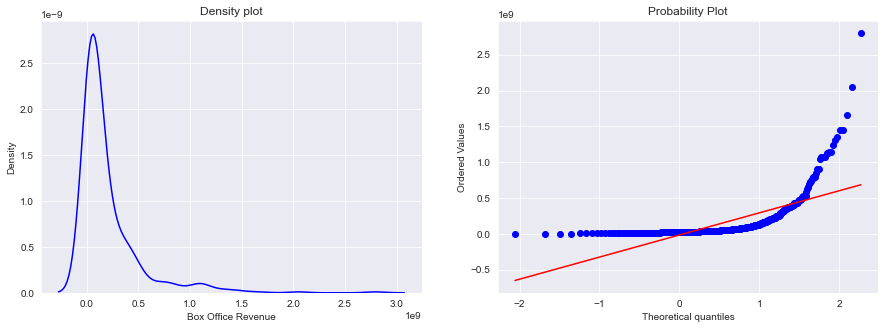

In [41]:
sn.set_style("darkgrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sn.kdeplot(main_dataset["box_office"], bw_adjust = 1, color = "blue", ax = ax1)
ax1.set_title('Density plot')
ax1.set_xlabel('Box Office Revenue')
stats.probplot(main_dataset["box_office"], dist=stats.loggamma, sparams=(2.5,), plot=ax2)
plt.show()

In [30]:
import scipy.stats as stats

Although I'm pretty sure the variable doesn't have a normal distribution, I'll check it with the Wilk-Shapiro test.

In [31]:
stats.shapiro(main_dataset["box_office"])

ShapiroResult(statistic=0.6067183613777161, pvalue=3.923390506773421e-30)

The p-value is very low, so I reject the null hypothesis and conclude that the "Box Office Revenue" is non-normal. Because the assumption of normality is violated, I can't use parametric methods. Therefore, I'll use a non-parametric test:

<b>Mann Whitney U test</b>

The p-value is very low, so I can assume that the means of both populations are different.

In [33]:
main_dataset['date'] = main_dataset.prem_year.apply(lambda x: "pre_covid" if x in ["2018", "2019"] else "post_covid")

stats.mannwhitneyu(main_dataset.loc[main_dataset.date == "pre_covid"]["box_office"], 
                main_dataset.loc[main_dataset.date == "post_covid"]["box_office"])

MannwhitneyuResult(statistic=12619.0, pvalue=1.0840467705675118e-10)

I'll examine this result on a bar plot, too.

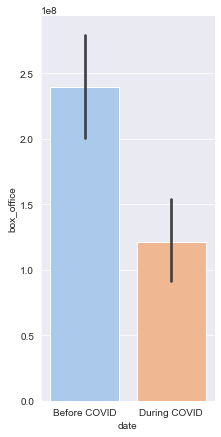

In [34]:
sn.set_style("darkgrid")
ax = sn.catplot(x='date', y = 'box_office', kind = 'bar', order = ['pre_covid', 'post_covid'], height = 6, aspect = .5,
           data = main_dataset, palette = 'pastel')
ax.set_xticklabels(['Before COVID', 'During COVID'])
plt.show()

Now, let me look at the count plot and see how much premieres were postponed during COVID. Based on data from Box Office Mojo, there's a difference of over a hundered releases between the two periods.

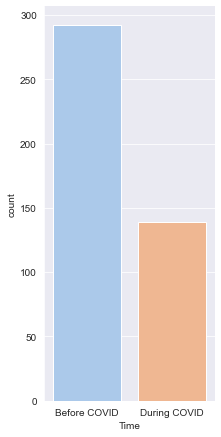

In [35]:
sn.set_style("darkgrid")
ax = sn.catplot(x = "date", data = main_dataset, kind = "count", order = ['pre_covid', 'post_covid'],
                height = 6, aspect = .5, palette = 'pastel')
plt.xlabel('Time')
ax.set_xticklabels(['Before COVID', 'During COVID'])
plt.show()

The second research question concerns the revenue of particular genres during the pandemic. But before that, I'll check which genres had the most releases. While I'm at it, I'll also check whether premiere quarters changed because of COVID.

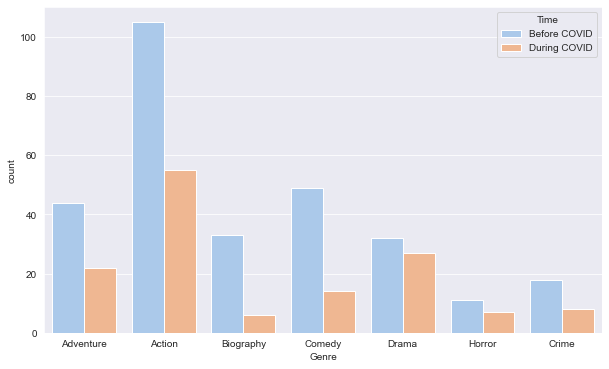

In [46]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
sn.set_style("darkgrid")
sn.countplot(x='genre', hue = 'date', hue_order = ['pre_covid', 'post_covid'], 
           data = main_dataset, palette = 'pastel')
plt.xlabel('Genre')
plt.legend(title='Time', loc='upper right', labels=['Before COVID', 'During COVID'])
plt.show()

Action flicks still had the most premieres and there was a very small drop in dramas. It's interesting that there was a huge drop in comedy premieres. Well, I can't really blame people for not being in a laughing mood during the pandemic.

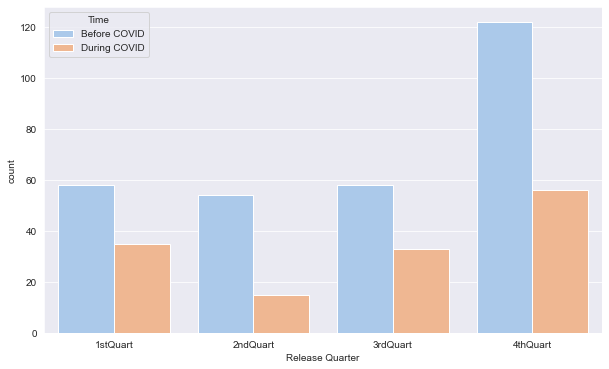

In [37]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
sn.set_style("darkgrid")
sn.countplot(x='release_quarter', hue = 'date', hue_order = ['pre_covid', 'post_covid'], 
             order = ['1stQuart', '2ndQuart', '3rdQuart', '4thQuart'], data = main_dataset, palette = 'pastel')
plt.xlabel('Release Quarter')
plt.legend(title='Time', loc='upper left', labels=['Before COVID', 'During COVID'])
plt.show()

There was not much change in the relase quarters. Fourth quarter was still the most busy, even after the COVID outbreak. Second quarter had much less releases than before, probably because I included the second quarter of 2020. Many cinemas were closed at that time.

<b>Now for answering whether revenues of particular genres changed after the pandemic started.</b>

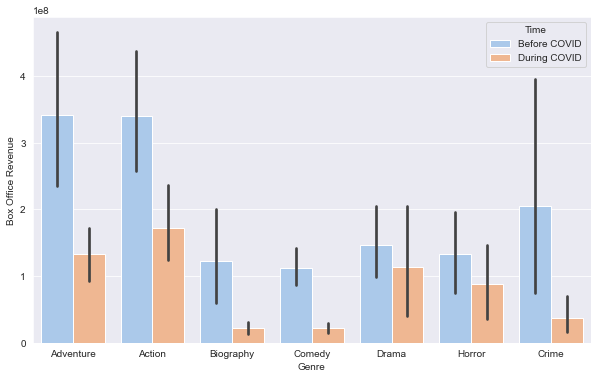

In [90]:
labels = ['Before COVID', 'During COVID']
sn.set_style("darkgrid")
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
sn.barplot(x='genre', y='box_office', hue = 'date', hue_order = ['pre_covid', 'post_covid'],
           data = main_dataset, palette = 'pastel')
plt.xlabel('Genre')
plt.ylabel('Box Office Revenue')
h, l = ax.get_legend_handles_labels()
plt.legend(h, labels, title='Time', loc='upper right')
plt.show()

So, what does it say? Unsurprisingly, adventure and action movies were still the most popular before and during the pandemic. The two least popular genres - Biography and Comedy, suffered a huge drop in revenue. But it's actually the crime flicks that suffered the most.

<b>The last reseach question. Were films from before the pandemic better or worse, according to the IMDb scores?</b>

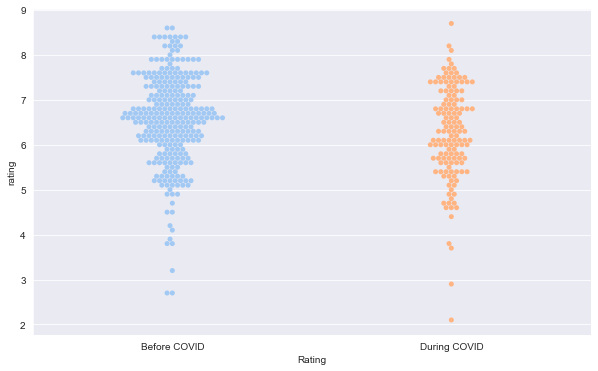

In [48]:
sn.set_style("darkgrid")
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
ax = sn.swarmplot(x='date', y = 'rating', order = ['pre_covid', 'post_covid'], data = main_dataset, ax=ax, palette = 'pastel')
plt.xlabel('Time')
plt.xlabel('Rating')
ax.set_xticklabels(['Before COVID', 'During COVID'])
plt.show()

Pre COVID most movies were rated between 6 and 7. After the pandemic had started, the sample is much more evenly distributed, although most film still fall in the 6 to 7 score.